In [56]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 1
from nltk.corpus import gutenberg

# 2
from nltk.tokenize import word_tokenize, sent_tokenize

# 3
from nltk.corpus import stopwords

# 4
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# 5
from nltk import pos_tag

# 6
from nltk import ne_chunk
from nltk.tree import Tree



In [2]:
# 2
# Prepare 
words_list = gutenberg.words ("shakespeare-hamlet.txt")
words_str = ""
for j in words_list:
    words_str += j + " "

# Tokenize

words_no_filter = word_tokenize (words_str)
sents = sent_tokenize (words_str)
sents [:5]

['[ The Tragedie of Hamlet by William Shakespeare 1599 ] Actus Primus .',
 'Scoena Prima .',
 'Enter Barnardo and Francisco two Centinels .',
 'Barnardo .',
 "Who ' s there ?"]

In [3]:
# 2.5
def isword (string):
    for char in string:
        if ord (char.lower()) < 97:
            return False
        elif ord (char.lower ()) > 122:
            return False
    return True

words = list (filter (isword, words_no_filter))

In [4]:
# 3 remove stop words
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]
print("Filtered Words:", filtered_words)

Filtered Words: ['Tragedie', 'Hamlet', 'William', 'Shakespeare', 'Actus', 'Primus', 'Scoena', 'Prima', 'Enter', 'Barnardo', 'Francisco', 'two', 'Centinels', 'Barnardo', 'Fran', 'Nay', 'answer', 'Stand', 'vnfold', 'selfe', 'Bar', 'Long', 'liue', 'King', 'Fran', 'Barnardo', 'Bar', 'Fran', 'come', 'carefully', 'vpon', 'houre', 'Bar', 'Tis', 'strook', 'twelue', 'get', 'thee', 'bed', 'Francisco', 'Fran', 'releefe', 'much', 'thankes', 'Tis', 'bitter', 'cold', 'sicke', 'heart', 'Barn', 'Haue', 'quiet', 'Guard', 'Fran', 'Mouse', 'stirring', 'Barn', 'Well', 'goodnight', 'meet', 'Horatio', 'Marcellus', 'Riuals', 'Watch', 'bid', 'make', 'hast', 'Enter', 'Horatio', 'Marcellus', 'Fran', 'thinke', 'heare', 'Stand', 'Hor', 'Friends', 'ground', 'Mar', 'Leige', 'men', 'Dane', 'Fran', 'Giue', 'good', 'night', 'Mar', 'farwel', 'honest', 'Soldier', 'hath', 'relieu', 'Fra', 'Barnardo', 'ha', 'place', 'giue', 'goodnight', 'Exit', 'Fran', 'Mar', 'Holla', 'Barnardo', 'Bar', 'Say', 'Horatio', 'Hor', 'peece', '

In [5]:
# 4 Stemming and Lemmatization

stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]
print("Stemmed Words:", stemmed_words)

lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
print("Lemmatized Words:", lemmatized_words)

Stemmed Words: ['tragedi', 'hamlet', 'william', 'shakespear', 'actu', 'primu', 'scoena', 'prima', 'enter', 'barnardo', 'francisco', 'two', 'centinel', 'barnardo', 'fran', 'nay', 'answer', 'stand', 'vnfold', 'self', 'bar', 'long', 'liue', 'king', 'fran', 'barnardo', 'bar', 'fran', 'come', 'care', 'vpon', 'hour', 'bar', 'ti', 'strook', 'twelu', 'get', 'thee', 'bed', 'francisco', 'fran', 'releef', 'much', 'thank', 'ti', 'bitter', 'cold', 'sick', 'heart', 'barn', 'haue', 'quiet', 'guard', 'fran', 'mous', 'stir', 'barn', 'well', 'goodnight', 'meet', 'horatio', 'marcellu', 'riual', 'watch', 'bid', 'make', 'hast', 'enter', 'horatio', 'marcellu', 'fran', 'think', 'hear', 'stand', 'hor', 'friend', 'ground', 'mar', 'leig', 'men', 'dane', 'fran', 'giue', 'good', 'night', 'mar', 'farwel', 'honest', 'soldier', 'hath', 'relieu', 'fra', 'barnardo', 'ha', 'place', 'giue', 'goodnight', 'exit', 'fran', 'mar', 'holla', 'barnardo', 'bar', 'say', 'horatio', 'hor', 'peec', 'bar', 'welcom', 'horatio', 'welco

In [6]:
# 5 POS

pos_tags = pos_tag(words)
print("POS Tags:", pos_tags)
POS_hist = np.array ([k[1] for k in pos_tags])

POS Tags: [('The', 'DT'), ('Tragedie', 'NNP'), ('of', 'IN'), ('Hamlet', 'NNP'), ('by', 'IN'), ('William', 'NNP'), ('Shakespeare', 'NNP'), ('Actus', 'NNP'), ('Primus', 'NNP'), ('Scoena', 'NNP'), ('Prima', 'NNP'), ('Enter', 'NNP'), ('Barnardo', 'NNP'), ('and', 'CC'), ('Francisco', 'NNP'), ('two', 'CD'), ('Centinels', 'NNP'), ('Barnardo', 'NNP'), ('Who', 'NNP'), ('s', 'VBP'), ('there', 'EX'), ('Fran', 'NNP'), ('Nay', 'NNP'), ('answer', 'IN'), ('me', 'PRP'), ('Stand', 'NNP'), ('vnfold', 'VB'), ('your', 'PRP$'), ('selfe', 'JJ'), ('Bar', 'NNP'), ('Long', 'NNP'), ('liue', 'VBD'), ('the', 'DT'), ('King', 'NNP'), ('Fran', 'NNP'), ('Barnardo', 'NNP'), ('Bar', 'NNP'), ('He', 'PRP'), ('Fran', 'NNP'), ('You', 'PRP'), ('come', 'VBP'), ('most', 'RBS'), ('carefully', 'RB'), ('vpon', 'VB'), ('your', 'PRP$'), ('houre', 'NN'), ('Bar', 'NNP'), ('Tis', 'NNP'), ('now', 'RB'), ('strook', 'VBZ'), ('twelue', 'JJ'), ('get', 'VB'), ('thee', 'JJ'), ('to', 'TO'), ('bed', 'VB'), ('Francisco', 'NNP'), ('Fran', 'NNP'

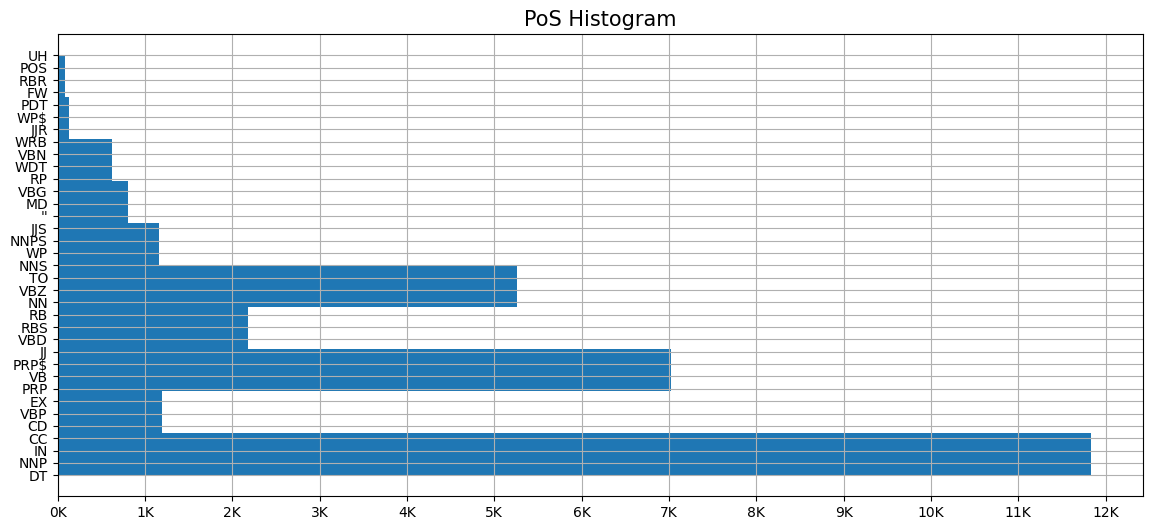

In [7]:
fig, ax = plt.subplots (figsize=(14, 6));
major_ticks = np.arange(0, 12001, 1000)
# minor_ticks = np.arange(0, 12001, 45)
ax.set_xticks(major_ticks)
# plt.xticks(minor_ticks, minor=True)
# plt.yticks(major_ticks)
# plt.yticks(minor_ticks, minor=True)

def thousands (x, pos):
    return '{:1.0f}K'.format(x*1e-3)

# And a corresponding grid
ax.grid(which='both')
ax.xaxis.set_major_formatter(thousands)
ax.hist (POS_hist, orientation="horizontal");
ax.set_title ("PoS Histogram", size= 15);

In [12]:
# 6 NER

named_entities = ne_chunk(pos_tags)
# print("Named Entities:", named_entities)

# Extract named entities as a list of tuples
def extract_named_entities(tree):
    entities = []
    for subtree in tree:
        if isinstance(subtree, Tree):
            entity = " ".join([word for word, tag in subtree.leaves()])
            entity_type = subtree.label()
            entities.append((entity, entity_type))
    return entities

entities = extract_named_entities(named_entities)
print(entities)

[('Tragedie', 'ORGANIZATION'), ('Hamlet', 'GPE'), ('William Shakespeare Actus Primus Scoena Prima Enter Barnardo', 'PERSON'), ('Centinels Barnardo', 'ORGANIZATION'), ('Fran Nay', 'PERSON'), ('Bar Long', 'PERSON'), ('Fran Barnardo', 'PERSON'), ('Bar Tis', 'PERSON'), ('Francisco Fran', 'PERSON'), ('Barn Haue', 'PERSON'), ('Guard Fran', 'PERSON'), ('Mouse', 'ORGANIZATION'), ('Barn Well', 'PERSON'), ('Horatio', 'PERSON'), ('Riuals', 'ORGANIZATION'), ('Watch', 'GPE'), ('Marcellus Fran', 'PERSON'), ('Hor Friends', 'ORGANIZATION'), ('Mar', 'PERSON'), ('Leige', 'GPE'), ('Dane Fran', 'ORGANIZATION'), ('Mar O', 'PERSON'), ('Barnardo', 'PERSON'), ('Fran Mar Holla Barnardo Bar Say', 'PERSON'), ('Horatio', 'PERSON'), ('Bar Welcome Horatio', 'PERSON'), ('Marcellus Mar', 'PERSON'), ('Mar Horatio', 'PERSON'), ('Hor Tush', 'PERSON'), ('Bar Sit', 'PERSON'), ('Hor Well', 'PERSON'), ('Barnardo', 'PERSON'), ('Westward', 'PERSON'), ('Pole Had', 'ORGANIZATION'), ('Heauen Where', 'PERSON'), ('Marcellus', 'PER

In [13]:
entities_hist = np.array ([k[1] for k in entities])

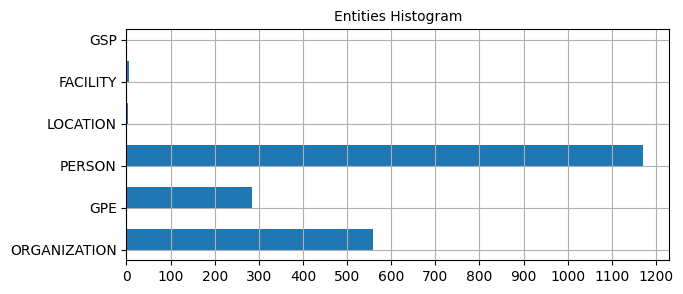

In [20]:
fig, ax = plt.subplots (figsize=(7, 3));
major_ticks = np.arange(0, 1501, 100)
ax.set_xticks(major_ticks)

# And a corresponding grid
ax.grid(which='both')
ax.hist (entities_hist, orientation="horizontal");
ax.set_title ("Entities Histogram", size= 10);

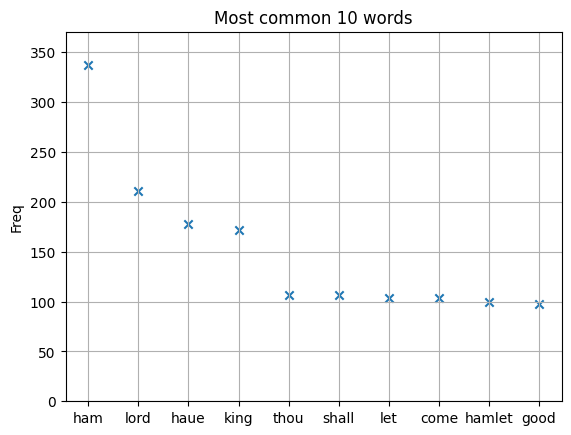

In [79]:
# 7

all_words = nltk.FreqDist(w.lower() for w in filtered_words) # frequency distribution object, counts the occurrence of each word

#sort
df = pd.DataFrame({"keys": all_words.keys(),
 "val": all_words.values()}).sort_values(by= ["val"], ascending= False)
plt.scatter (df.head(10)["keys"], df.head(10)["val"], marker="x");
plt.ylim (0, df["val"].max()*1.1);
major_ticks = np.arange(0, df["val"].max()*1.1, 50)
plt.yticks (major_ticks);
plt.grid(which='both');
plt.title ("Most common 10 words");
plt.ylabel ("Freq");


In [85]:
# Frequency of a specific word
specific_word = "hamlet"
print ("The word", str (specific_word), "has been found", all_words [specific_word], "times.")

The word hamlet has been found 100 times.
